# 第4章 （1）線形判別分析

In [48]:
# 魚データ
# 特徴ベクトル：2次元（体長, 体重）
# ラベル数：2（サケとスズキ）

# 確率密度関数で生成
# 分散共分散行列で楕円を指定

import numpy as np
import pandas as pd

# 乱数の種を初期化
np.random.seed(0)

# データ数
num1 = 100
num2 = 100
num = num1 + num2

# 平均
mu1 = [-2,2]
mu2 = [2,-2]

# 共分散
cov = [[2,1],[1,2]]

# 入力信号を生成
x1, y1 = np.random.multivariate_normal(mu1, cov, num1).T
x2, y2 = np.random.multivariate_normal(mu2, cov, num2).T

x1 += 110
y1 += 2800
x2 += 110
y2 += 2800

# 教師信号を生成
cls1 = [1 for i in range(num1)]
cls2 = [-1 for i in range(num1)]

# DataFrameに変換
df1 = pd.DataFrame(np.array([x1,y1,cls1]).T, columns=['x1','x2','cls'])
df2 = pd.DataFrame(np.array([x2,y2,cls2]).T, columns=['x1','x2','cls'])
df = pd.concat([df1,df2],axis=0)

# ファイル出力
df.to_csv('training.csv', index=None)

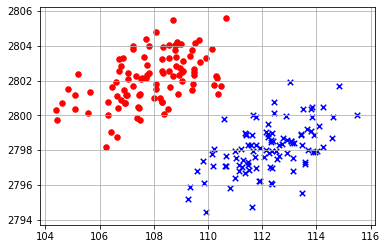

In [49]:
# 表示(正規化なし)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データ読み込み
df = pd.read_csv('training.csv')

# 散布図をプロットする
for i in range(len(df)):
    if df.cls[i]==1:
        plt.scatter(df.x1[i],df.x2[i], color='r',marker='o', s=30)
    else:
        plt.scatter(df.x1[i],df.x2[i], color='b',marker='x', s=30)

# グリッド表示
plt.grid(True)

# 表示
plt.show()

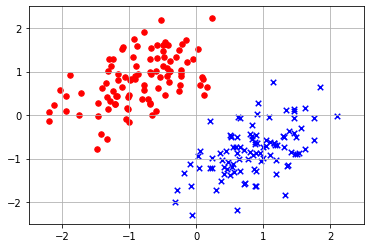

In [50]:
# 表示（正規化あり）

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as skl

# データ読み込み
df = pd.read_csv('training.csv')
df.x1 = skl.scale(df.x1) #正規化
df.x2 = skl.scale(df.x2) #正規化

# 散布図をプロットする
for i in range(len(df)):
    if df.cls[i]==1:
        plt.scatter(df.x1[i],df.x2[i], color='r',marker='o', s=30)
    else:
        plt.scatter(df.x1[i],df.x2[i], color='b',marker='x', s=30)

# 表示範囲
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

# グリッド表示
plt.grid(True)

# 表示
plt.show()

# ファイル出力
df.to_csv('training_reg.csv', index=None)

# 作成した魚データを分類する

In [51]:
# データを読み込んで，パーセプトロンで線形分離する

import numpy as np
import pandas as pd

# 乱数の種を初期化
np.random.seed(1)

# トレーニングデータを読み込む
df = pd.read_csv('training_reg.csv')

# トレーニングデータ数
num = len(df)

# 学習パラメータを設定
eta = 0.1 # 学習係数
dimention = 3 # x1, x2が入力ベクトルの次元数，つまり2次元．さらにオフセットを学習するためにx0を加えて3次元となる．
iteration = 1000 # 学習回数

# 初期重みを乱数で与える
weight = (np.random.random(dimention) - 0.5)*2.5 # [0:1]の乱数-0.5で，[-0.5:0.5]の乱数となる．[-0.5:0.5]*2.5で[-2.5:2.5]の乱数となる．

# パーセプトロンの学習
for t in range(iteration):
    i = np.random.randint(num-1)
    data = np.array([1.0, df.x1[i], df.x2[i]]) # オフセットを学習するためのx0は常に1.0を与える．
    dot = np.dot(weight, data) # 内積を計算

    # 教師信号ではない出力を行っていたら，学習する．
    if (dot>0 and df.cls[i]==-1):
        weight = weight - eta*data
    elif (dot<0 and df.cls[i]==1):
        weight = weight + eta*data

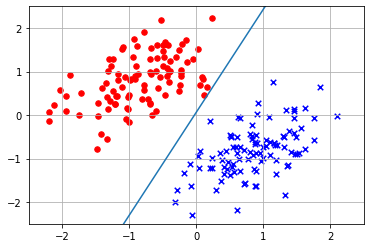

In [52]:
# 学習した重みを使って，表示する

import matplotlib.pyplot as plt

# 識別境界面
x = np.linspace(-2.5,2.5,100)
y = (-1*weight[1]*x - weight[0])/weight[2]
plt.plot(x,y)


# 散布図をプロットする
for i in range(len(df)):
    if df.cls[i]==1:
        plt.scatter(df.x1[i],df.x2[i], color='r',marker='o', s=30)
    else:
        plt.scatter(df.x1[i],df.x2[i], color='b',marker='x', s=30)

# 表示範囲
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

# グリッド表示
plt.grid(True)

# 表示
plt.show()